# Mail Spam Detection

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv('spam.csv',encoding='latin1',usecols=['v1','v2'])
df = data.copy(deep=True)

In [32]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [33]:
df.rename(columns={'v1':'Class','v2':'Mail'},inplace=True)

In [34]:
df['Class'].value_counts()

Class
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

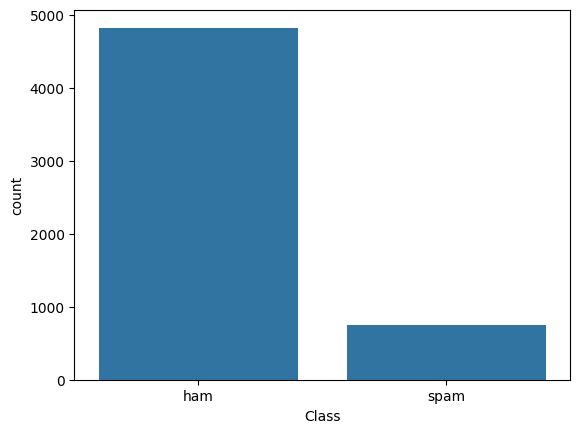

In [35]:
sns.barplot(df['Class'].value_counts())

In [36]:
import nltk
from nltk.corpus import stopwords
def remove_stopwords(text):
    x = []
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    return x
df['Mail'] = df['Mail'].apply(remove_stopwords)

In [39]:
import re

def remove_symbols(text):
    # Remove symbols using regular expression
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text
df['Mail'] = df['Mail'].astype(str).apply(remove_symbols)


### Data Split

In [41]:
X = df[['Mail']]
y = df['Class']

In [42]:
X.shape,y.shape

((5572, 1), (5572,))

In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [44]:
# print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(4457, 1) (4457,) (1115, 1) (1115,)


### Vecotrizing the splits

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)

X_train = cv.fit_transform(X_train['Mail']).toarray()
# X_valid = cv.fit_transform(X_valid['Mail']).toarray()
X_test = cv.fit_transform(X_test['Mail']).toarray()

print(X_train.shape)
print('Vectorization complete')

(4457, 1000)
Vectorization complete


### Model Selection

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [47]:
def train_model(models, X_train, y_train,X_test,y_test):
    for model in models:
        model.fit(X_train,y_train)
        
        # Evaluate the model on the validation set
        accuracy = model.score(X_test, y_test)
        
        print(f'Accuracy % of {model.__class__.__name__}: {accuracy}')
        print('----------------------------------------------')


# Define the list of models
models = [GaussianNB(), MultinomialNB(), BernoulliNB()]

# Train and evaluate the models
train_model(models, X_train, y_train,X_test,y_test)

Accuracy % of GaussianNB: 0.726457399103139
----------------------------------------------
Accuracy % of MultinomialNB: 0.7659192825112108
----------------------------------------------
Accuracy % of BernoulliNB: 0.831390134529148
----------------------------------------------


### Model Tunning

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
bernoulli_nb = BernoulliNB()
grid_search = GridSearchCV(bernoulli_nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'alpha': 0.1}
Best Cross-Validation Score: 0.98


In [51]:
model = BernoulliNB(alpha=0.1)
model.fit(X_train,y_train)

BernoulliNB(alpha=0.1)

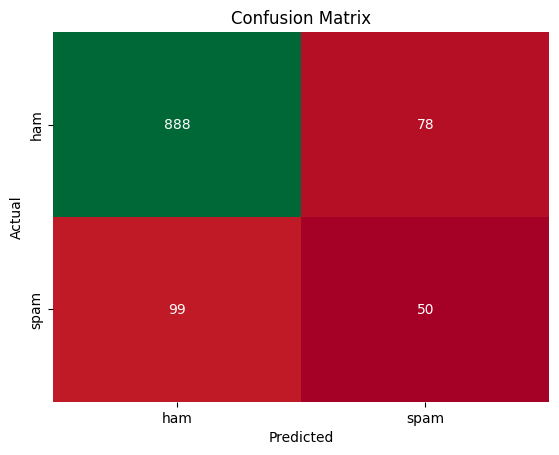

In [52]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_test)
cm = confusion_matrix(y_test, prediction)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
TN, FP, FN, TP = cm.ravel()
accuracy = (TN + TP) / (TN + FP + FN + TP)
print("Accuracy Score =", format(accuracy))

Accuracy Score = 0.841255605381166


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_true = y_test
precision = precision_score(y_true, y_pred, pos_label='spam')
recall = recall_score(y_true, y_pred, pos_label='spam')
f1 = f1_score(y_true, y_pred, pos_label='spam')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1) # F1 score should be 0.7 or higher to beed termed as good

Precision: 0.390625
Recall: 0.33557046979865773
F1 Score: 0.36101083032490977


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf=KFold(n_splits=5)
score=cross_val_score(model,X_train,y_train,cv=kf)
print(model)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

BernoulliNB(alpha=0.1)
Cross Validation Scores are [0.98654709 0.98766816 0.98204265 0.98653199 0.97530864]
Average Cross Validation score :0.9836197047706763


In [57]:
# Get user input
print('Enter the review:')
user_input = input()

# Create a DataFrame with a column containing the user input
df_user_input = pd.DataFrame({'text_column': [user_input]})

# Use the CountVectorizer to transform the preprocessed user input
input_data = cv.transform(df_user_input).toarray()

# Predict using the trained model
predicted_class = model.predict(input_data)

# Print the user input and predicted class
print(f"Review: {user_input}")
if predicted_class == 'spam':
    print('The mail is spam')
else:
    print('Not spam')


Enter the review:
Review: Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!
Not spam


In [ ]:
gfdsfa
Hey mohan, can we get together to watch footbal game tomorrow?
Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!

## Threshold 

In [ ]:
pred_score = model.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_valid,pred_score,pos_label='spam')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the data
roc_data = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})

# Plot ROC curve
plt.figure(figsize=(8, 8))
sns.lineplot(data=roc_data, x='fpr', y='tpr', label='ROC curve')

# Plot threshold points
n = 10
indices = np.arange(len(thresholds)) % n == 0
sns.scatterplot(data=roc_data[indices], x='fpr', y='tpr', label='Threshold points')

# Add text labels for threshold points
for index, row in roc_data[indices].iterrows():
    plt.text(row['fpr'], row['tpr'], f"Thr={row['thresholds']:.2f}", fontsize=8, ha='right', va='bottom')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random (Area = 0.5)')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

In [ ]:

# Convert predicted probabilities to binary predictions using the optimal threshold
binary_predictions = (pred_score >= optimal_threshold).astype(int)
# Evaluate the performance with the optimal threshold
confusion_matrix = pd.crosstab(y_valid, binary_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)

In [ ]:
# Get user input
print('Enter the review:')
user_input = input()

# Create a DataFrame with a column containing the user input
df_user_input = pd.DataFrame({'text_column': [user_input]})

# Use the CountVectorizer to transform the preprocessed user input
input_data = cv.transform(df_user_input).toarray()

# Predict using the trained model
pred_score = model.predict_proba(input_data)

 #print(pred_score2) [[0 , 1]]

if pred_score[0][1] > optimal_threshold:
    print('Not Spam')
else:
    print('spam')


In [ ]:
pred_score[0][1]

###### END

##### END